<a href="https://colab.research.google.com/github/teerasitk/01205415/blob/main/Assignment03_JKN_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance # install yfinance to access yahoo finance
import pandas as pd # spread sheet
import yfinance as yf # import yahoo finance
import datetime as dt # read date and time
import matplotlib.pyplot as plt # for plotting
import numpy as np # numpy array

#1. Find out historical prices of JPN: Plot historical prices (Whole Historical Adj. Close data)

[*********************100%%**********************]  1 of 1 completed


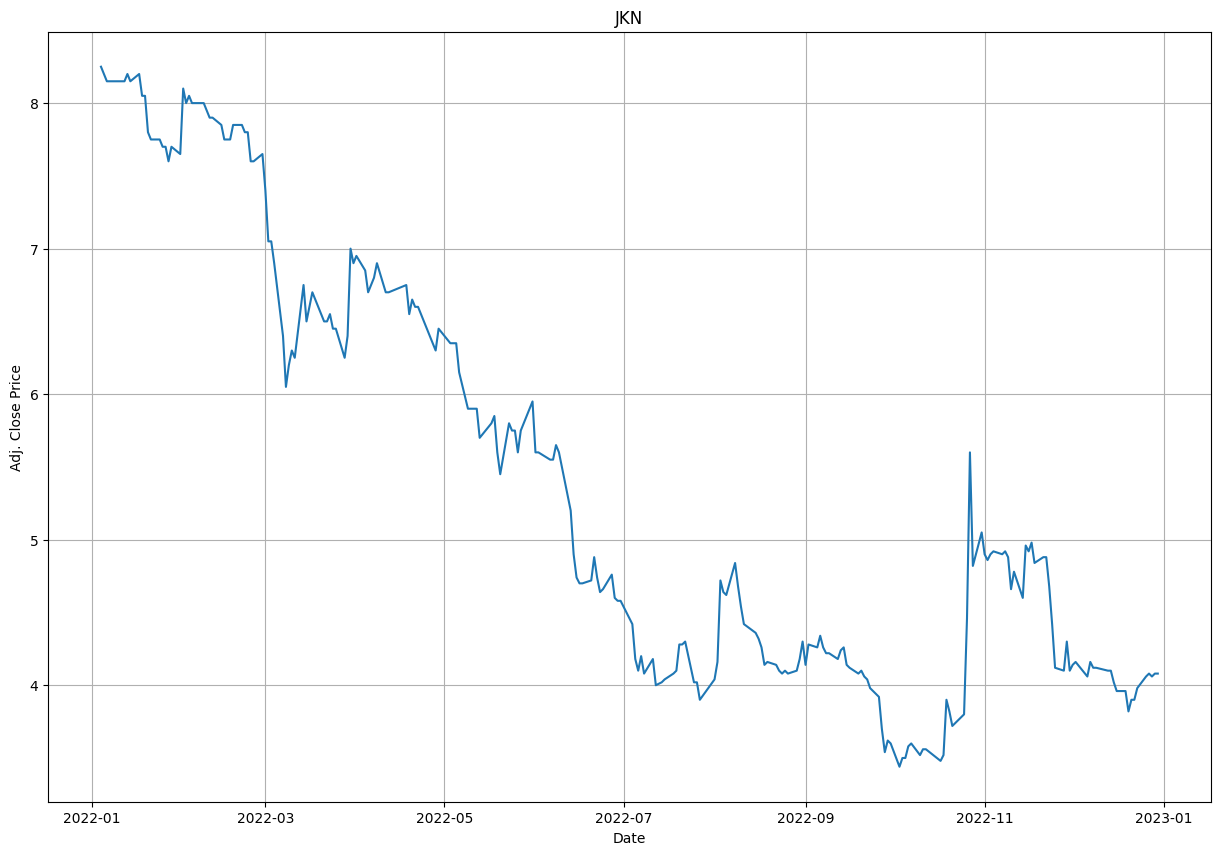

In [4]:
#Example code to download price on one stock in 2021
sym = "JKN" # stock symbol
df = yf.download(sym + ".BK", start="2022-01-01", end="2022-12-31") # download 2022 data
close_price = df['Adj Close'].dropna() # drop NA out from adjusted closed prices
plt.figure(figsize=(15,10))
plt.plot(close_price)
plt.xlabel("Date")
plt.ylabel("Adj. Close Price")
plt.title("JKN")
plt.grid()

#2. If you invest on JKN in Early 2022, what is your current gain (loss) in percentage at the end of 2022?

In [6]:
buy_price = close_price.iloc[0] # Buy at the first price
sell_price = close_price.iloc[-1] # Sell at the last price
pnl = sell_price/ buy_price - 1 # pnl: Profile aNd  Loss
if pnl >= 0:
  print(f"The profile of 2022: {pnl *100 :0.3f}%")
else:
  print(f"The Losss of 2022: ({-pnl *100 :0.3f})%")

The Losss of 2022: (50.545)%


# 3.Repeat 2 for current gain (loss) in percentage on Dec 1st 2023.

In [7]:
buy_price = close_price.iloc[0] # Buy at the first price
sym = "JKN" # stock symbol
df2023 = yf.download(sym + ".BK", start="2023-01-01", end="2023-12-31") # download 2022 data
sell_price = df2023.Close["2023-12-01"]
pnl = sell_price/ buy_price - 1 # pnl: Profile aNd  Loss
if pnl >= 0:
  print(f"The profile of 2022: {pnl *100 :0.3f}%")
else:
  print(f"The Losss of 2022: ({-pnl *100 :0.3f})%")

[*********************100%%**********************]  1 of 1 completed
The Losss of 2022: (93.091)%


#4.Has JKN issued any dividends or split the stock?

In [29]:
jkn = yf.Ticker("JKN.BK")
hist = jkn.history(period="max")
actions = jkn.actions
for date, values in actions.iterrows():
  dividend = values.Dividends
  split = values["Stock Splits"]
  txt = f"On {date.date()}"
  if dividend > 0:
    txt = f"{txt}, Dividend of {dividend:0.2f} per shares"
  if split > 0:
    txt = f"{txt}, Split of 1 share to {split} shares"
  print(txt)

On 2019-03-18, Dividend of 0.15 per shares
On 2020-03-16, Dividend of 0.12 per shares, Split of 1 share to 1.125 shares
On 2021-03-15, Dividend of 0.21 per shares


# 5.In .history function, we can specify internal find out how many day we can look back for 1 minute, 2 minutes, 30 minutes, 1 hour, and 1 day, and 1 week

In [37]:
periods = ["1m", "2m", "30m", "1h", "1d", "1wk"]
for period in periods:
  hist = jkn.history(period="max", interval=period)
  if len(hist):
    time_range = hist.index[-1]  - hist.index[0]
    print(f"Sucesssfully load data with the range of {time_range.days} days")

Sucesssfully load data with the range of 5 days


ERROR:yfinance:JKN.BK: 2m data not available for startTime=1512010800 and endTime=1704768664. The requested range must be within the last 60 days.
ERROR:yfinance:JKN.BK: 15m data not available for startTime=1512010800 and endTime=1704768665. The requested range must be within the last 60 days.
ERROR:yfinance:JKN.BK: 1h data not available for startTime=1512010800 and endTime=1704768666. The requested range must be within the last 730 days.


Sucesssfully load data with the range of 2230 days
Sucesssfully load data with the range of 2233 days




1.   1-minute: 5 days
2.   2-minutes: 60 days
3.   30-minutes: 60 days
4.   1-hour: 730 days
5.   1-day: 2230 days
6.   1-week: 2233 days



